In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os
from warnings import filterwarnings ; filterwarnings('ignore')

####  Merge the datasets Customers, Product Hierarchy and Transactions as Customer_Final. Ensure to keep all customers who have done transactions with us and select the join type accordingly.

##### Step-1: importing the required data

In [2]:
cus = pd.read_csv(r"Case Study 1 - Retail Case Study\Customer.csv")
trans = pd.read_csv(r"Case Study 1 - Retail Case Study\Transactions.csv")
prod_cat_info = pd.read_csv(r"Case Study 1 - Retail Case Study\prod_cat_info.csv")

##### Step-2: merging data files into one dataset

In [3]:
merge1 = pd.merge(cus, 
                  trans, 
                  left_on = 'customer_Id', 
                  right_on = 'cust_id', 
                  how = 'inner')

Customer_Final = pd.merge(merge1, 
                          prod_cat_info[['prod_cat_code', 'prod_sub_cat_code', 'prod_cat', 'prod_subcat']], 
                          left_on = ['prod_cat_code', 'prod_subcat_code'], 
                          right_on = ['prod_cat_code', 'prod_sub_cat_code'], 
                          how = 'inner')
Customer_Final.head()

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_sub_cat_code,prod_cat,prod_subcat
0,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,7,Books,Fiction
1,268408,02-01-1970,M,4.0,16197868036,268408,16-12-2013,1,4,-5,-210,110.250,-1160.250,Flagship store,1,Bags,Mens
2,268408,02-01-1970,M,4.0,16197868036,268408,12/12/2013,1,4,5,210,110.250,1160.250,Flagship store,1,Bags,Mens
3,268408,02-01-1970,M,4.0,28810141075,268408,2/9/2013,10,6,2,813,170.730,1796.730,TeleShop,10,Home and kitchen,Kitchen
4,268408,02-01-1970,M,4.0,64633435931,268408,6/5/2013,4,2,3,312,98.280,1034.280,Flagship store,4,Footwear,Kids


##### Step-3: Fixing data type (date columns: DOB, tran_date | other variables: city_code)

In [4]:
Customer_Final.loc[:, ['DOB', 'tran_date']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23053 entries, 0 to 23052
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   DOB        23053 non-null  object
 1   tran_date  23053 non-null  object
dtypes: object(2)
memory usage: 360.3+ KB


In [5]:
Customer_Final['tran_date'] = pd.to_datetime(Customer_Final['tran_date'].apply(lambda x: x.replace('/', '-')))
Customer_Final['tran_date'].head()

0   2014-01-13
1   2013-12-16
2   2013-12-12
3   2013-09-02
4   2013-05-06
Name: tran_date, dtype: datetime64[ns]

In [6]:
Customer_Final['DOB'] = pd.to_datetime(Customer_Final['DOB'].apply(lambda x: x.replace('/', '-')), format = '%d-%m-%Y')
Customer_Final['DOB'].head()

0   1970-01-02
1   1970-01-02
2   1970-01-02
3   1970-01-02
4   1970-01-02
Name: DOB, dtype: datetime64[ns]

In [7]:
# Verifying the data type
Customer_Final.loc[:, ['DOB', 'tran_date']].dtypes

DOB          datetime64[ns]
tran_date    datetime64[ns]
dtype: object

In [8]:
Customer_Final['city_code'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 23053 entries, 0 to 23052
Series name: city_code
Non-Null Count  Dtype  
--------------  -----  
23045 non-null  float64
dtypes: float64(1)
memory usage: 180.2 KB


In [9]:
Customer_Final['city_code'] = Customer_Final['city_code'].astype('object')
Customer_Final['city_code'] = Customer_Final['city_code'].astype('Int64')
Customer_Final['city_code'].dtypes

Int64Dtype()

In [10]:
Customer_Final.head()

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_sub_cat_code,prod_cat,prod_subcat
0,268408,1970-01-02,M,4,87243835584,268408,2014-01-13,7,5,5,187,98.175,1033.175,TeleShop,7,Books,Fiction
1,268408,1970-01-02,M,4,16197868036,268408,2013-12-16,1,4,-5,-210,110.250,-1160.250,Flagship store,1,Bags,Mens
2,268408,1970-01-02,M,4,16197868036,268408,2013-12-12,1,4,5,210,110.250,1160.250,Flagship store,1,Bags,Mens
3,268408,1970-01-02,M,4,28810141075,268408,2013-09-02,10,6,2,813,170.730,1796.730,TeleShop,10,Home and kitchen,Kitchen
4,268408,1970-01-02,M,4,64633435931,268408,2013-05-06,4,2,3,312,98.280,1034.280,Flagship store,4,Footwear,Kids


#### Prepare a summary report for the merged data set

##### a. Get the column names and their corresponding data types

In [11]:
Customer_Final.dtypes

customer_Id                   int64
DOB                  datetime64[ns]
Gender                       object
city_code                     Int64
transaction_id                int64
cust_id                       int64
tran_date            datetime64[ns]
prod_subcat_code              int64
prod_cat_code                 int64
Qty                           int64
Rate                          int64
Tax                         float64
total_amt                   float64
Store_type                   object
prod_sub_cat_code             int64
prod_cat                     object
prod_subcat                  object
dtype: object

##### b. Top/Bottom 10 observations

In [12]:
Customer_Final.head(10)

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_sub_cat_code,prod_cat,prod_subcat
0,268408,1970-01-02,M,4,87243835584,268408,2014-01-13,7,5,5,187,98.175,1033.175,TeleShop,7,Books,Fiction
1,268408,1970-01-02,M,4,16197868036,268408,2013-12-16,1,4,-5,-210,110.250,-1160.250,Flagship store,1,Bags,Mens
2,268408,1970-01-02,M,4,16197868036,268408,2013-12-12,1,4,5,210,110.250,1160.250,Flagship store,1,Bags,Mens
3,268408,1970-01-02,M,4,28810141075,268408,2013-09-02,10,6,2,813,170.730,1796.730,TeleShop,10,Home and kitchen,Kitchen
4,268408,1970-01-02,M,4,64633435931,268408,2013-05-06,4,2,3,312,98.280,1034.280,Flagship store,4,Footwear,Kids
5,268408,1970-01-02,M,4,56902862040,268408,2013-01-30,9,3,5,868,455.700,4795.700,e-Shop,9,Electronics,Cameras
6,268408,1970-01-02,M,4,56844530655,268408,2012-10-14,1,2,5,1175,616.875,6491.875,MBR,1,Footwear,Mens
7,268408,1970-01-02,M,4,19516063887,268408,2012-09-07,10,3,4,650,273.000,2873.000,e-Shop,10,Electronics,Audio and video
8,268408,1970-01-02,M,4,12644501524,268408,2012-08-14,4,4,3,321,101.115,1064.115,TeleShop,4,Bags,Women
9,268408,1970-01-02,M,4,63314547725,268408,2012-04-26,1,1,1,806,84.630,890.630,Flagship store,1,Clothing,Women


In [13]:
Customer_Final.tail(10)

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_sub_cat_code,prod_cat,prod_subcat
23043,270476,1992-12-25,F,3,78034405353,270476,2013-08-13,11,6,1,971,101.955,1072.955,TeleShop,11,Home and kitchen,Bath
23044,270476,1992-12-25,F,3,3359888057,270476,2013-03-16,10,3,4,361,151.620,1595.620,MBR,10,Electronics,Audio and video
23045,270476,1992-12-25,F,3,22883386455,270476,2012-05-22,4,2,4,898,377.160,3969.160,Flagship store,4,Footwear,Kids
23046,270476,1992-12-25,F,3,19725194268,270476,2012-02-21,4,4,4,618,259.560,2731.560,e-Shop,4,Bags,Women
23047,270476,1992-12-25,F,3,85475160771,270476,2011-08-09,5,3,5,1354,710.850,7480.850,Flagship store,5,Electronics,Computers
23048,269626,1992-12-27,F,5,71369029396,269626,2011-10-18,12,6,1,638,66.990,704.990,e-Shop,12,Home and kitchen,Tools
23049,269626,1992-12-27,F,5,94134051896,269626,2011-07-07,3,1,3,1078,339.570,3573.570,MBR,3,Clothing,Kids
23050,274308,1992-12-29,F,5,26208690928,274308,2012-10-22,1,2,2,898,188.580,1984.580,MBR,1,Footwear,Mens
23051,274308,1992-12-29,F,5,57358822237,274308,2012-09-05,1,2,4,876,367.920,3871.920,e-Shop,1,Footwear,Mens
23052,274308,1992-12-29,F,5,58160544337,274308,2012-07-04,12,5,5,588,308.700,3248.700,e-Shop,12,Books,Academic


##### c. “Five-number summary” for continuous variables (min, Q1, median, Q3 and max)

In [14]:
# “Five-number summary” for continuous variables (relevant variables: 'Qty', 'Rate', 'Tax', 'total_amt') 

desc = Customer_Final.loc[:, ['Qty', 'Rate', 'Tax', 'total_amt']].describe(percentiles = [.25, .75])
desc = desc.T
desc.drop(labels = ['count', 'std', '50%'], inplace = True, axis = 1)
desc.rename(columns = {'25%' : 'Q1', '75%' : 'Q3'}, inplace = True)
desc = desc.T
desc

,Qty,Rate,Tax,total_amt
mean,2.432395,636.369713,248.667192,2107.308002
min,-5.000000,-1499.000000,7.350000,-8270.925000
Q1,1.000000,312.000000,98.280000,762.450000
Q3,4.000000,1109.000000,365.715000,3569.150000
max,5.000000,1500.000000,787.500000,8287.500000


In [15]:
# “Five-number summary” for continuous variables (including irrrelevant variables) 

desc = Customer_Final.loc[:, :].describe(percentiles = [.25, .75])
desc = desc.T
desc.drop(labels = ['count', 'std', '50%'], inplace = True, axis = 1)
desc.rename(columns = {'25%' : 'Q1', '75%' : 'Q3'}, inplace = True)
desc = desc.T
desc

,customer_Id,DOB,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,prod_sub_cat_code
mean,271021.746497,1981-07-14 21:22:57.816336256,5.482534,50073480358.450485,271021.746497,2012-08-09 05:21:26.617793792,6.149091,3.763632,2.432395,636.369713,248.667192,2107.308002,6.149091
min,266783.0,1970-01-02 00:00:00,1.0,3268991.0,266783.0,2011-01-25 00:00:00,1.0,1.0,-5.0,-1499.0,7.35,-8270.925,1.0
Q1,268935.0,1975-09-26 00:00:00,3.0,24938639453.0,268935.0,2011-11-03 00:00:00,3.0,2.0,1.0,312.0,98.28,762.45,3.0
Q3,273114.0,1987-06-05 00:00:00,8.0,75329995679.0,273114.0,2013-05-17 00:00:00,10.0,5.0,4.0,1109.0,365.715,3569.15,10.0
max,275265.0,1992-12-29 00:00:00,10.0,99987549630.0,275265.0,2014-02-28 00:00:00,12.0,6.0,5.0,1500.0,787.5,8287.5,12.0


##### d. Frequency tables for all the categorical variables

In [16]:
Customer_Final.loc[:, Customer_Final.dtypes == object].describe()

,Gender,Store_type,prod_cat,prod_subcat
count,23044,23053,23053,23053
unique,2,4,6,18
top,M,e-Shop,Books,Women
freq,11811,9311,6069,3048


#### Generate histograms for all continuous variables and frequency bars for categorical variables.

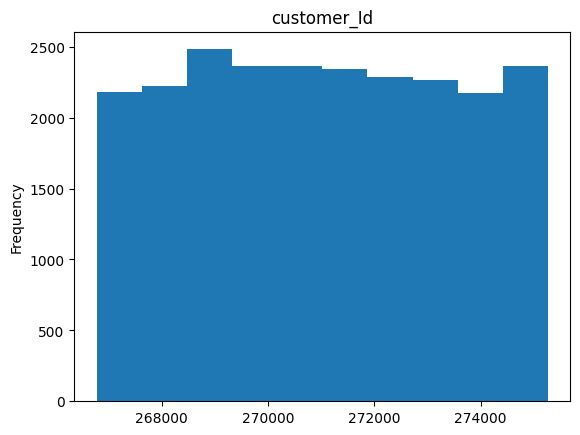

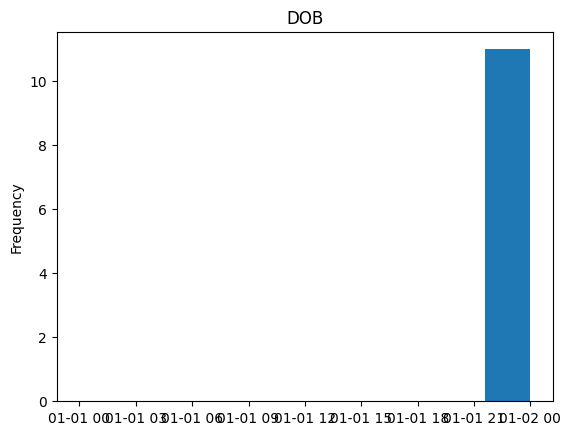

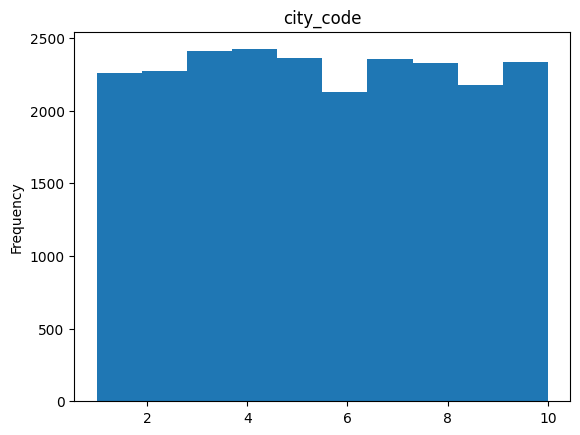

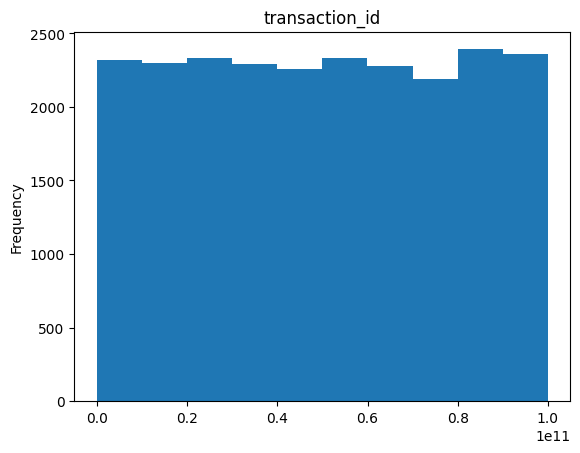

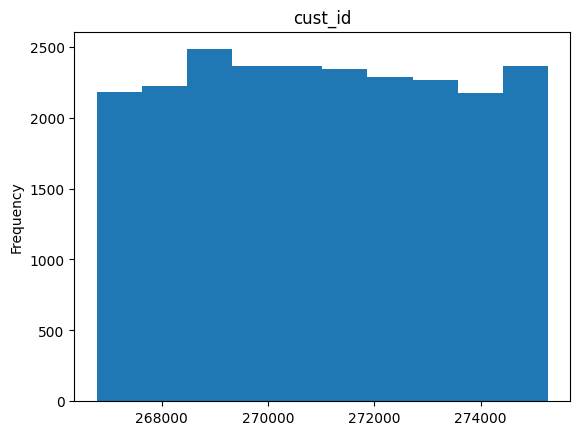

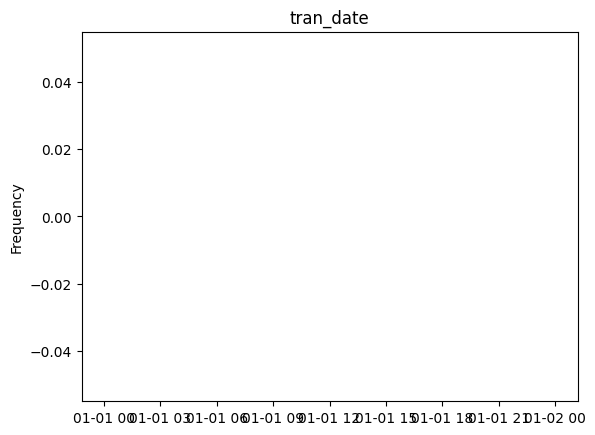

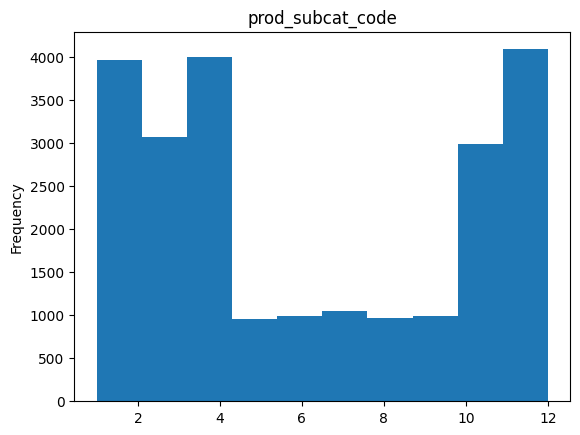

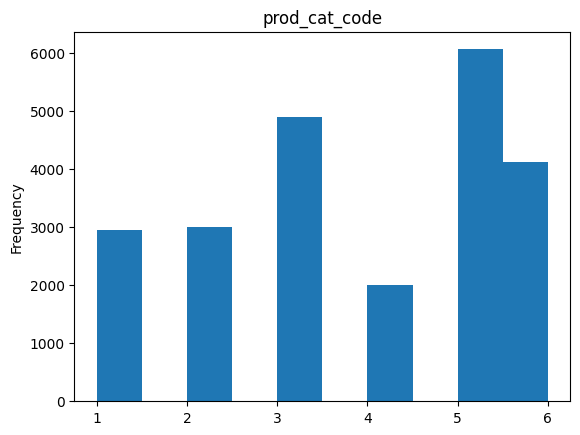

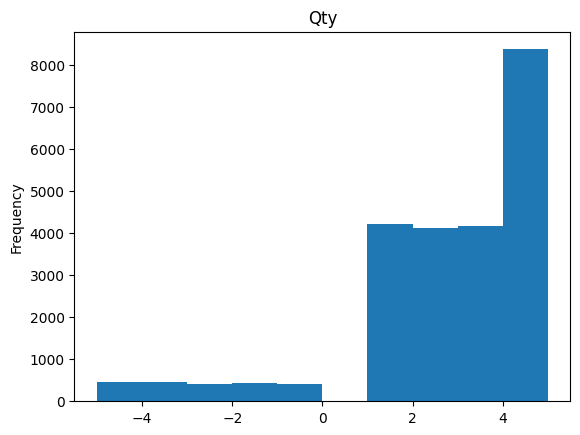

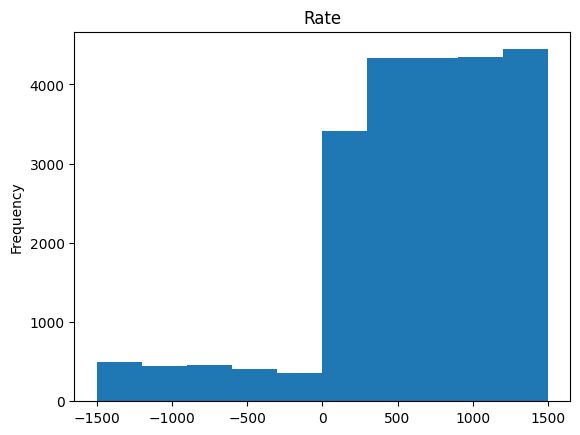

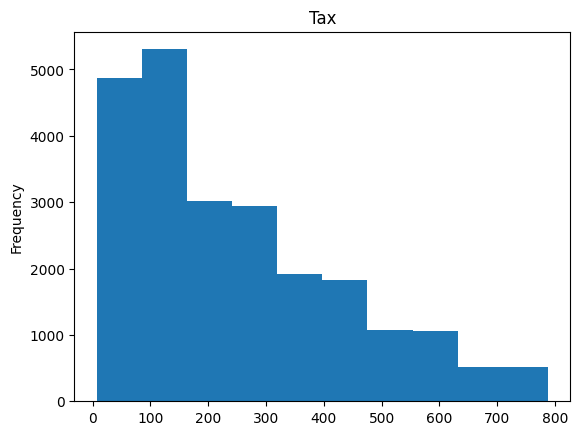

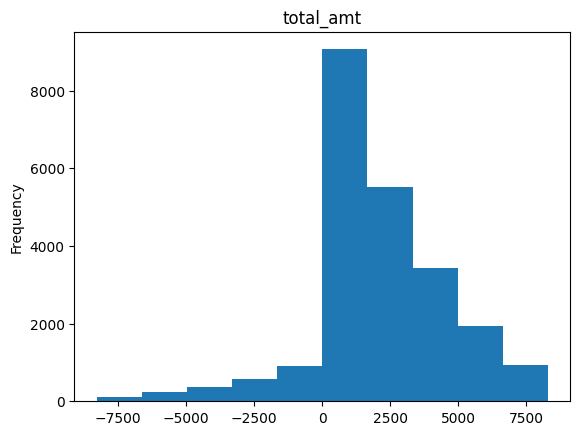

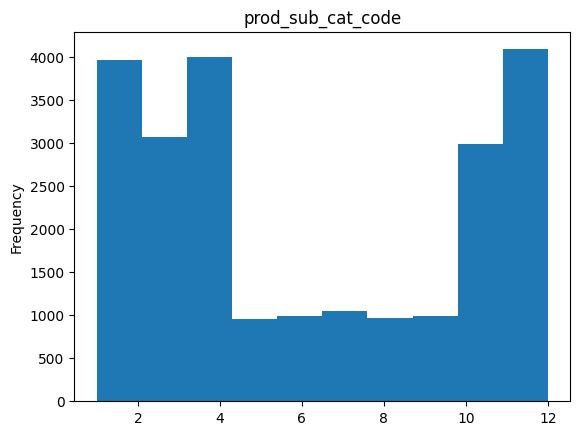

In [17]:
cont_var = Customer_Final.loc[:, (Customer_Final.dtypes != object)]

for v in cont_var.columns:
    Customer_Final[v].plot(kind = 'hist')
    plt.title(v)
    plt.show()

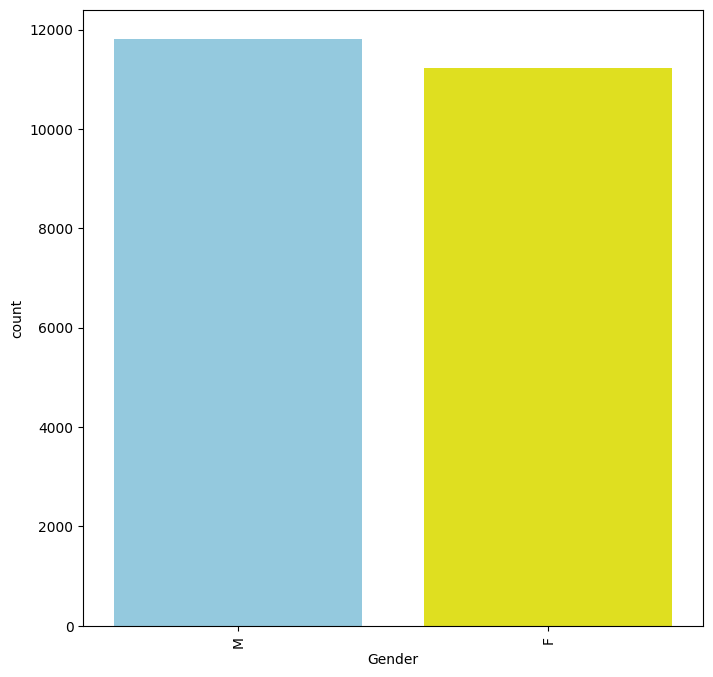

In [18]:
cat_var = Customer_Final.loc[:, Customer_Final.dtypes == object]

plt.figure(figsize=(8,8))
sns.countplot(x = cat_var['Gender'], palette=['skyblue', 'yellow'])
plt.xticks(rotation='vertical')
plt.show()

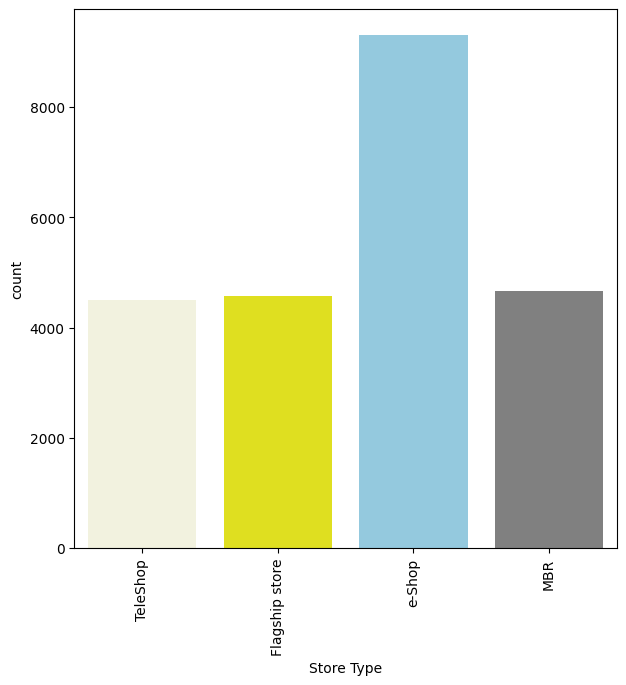

In [19]:
plt.figure(figsize=(7,7))
sns.countplot(x = cat_var['Store_type'], palette = ['beige', 'yellow', 'skyblue', 'grey'])
plt.xlabel('Store Type')
plt.xticks(rotation='vertical')
plt.show()

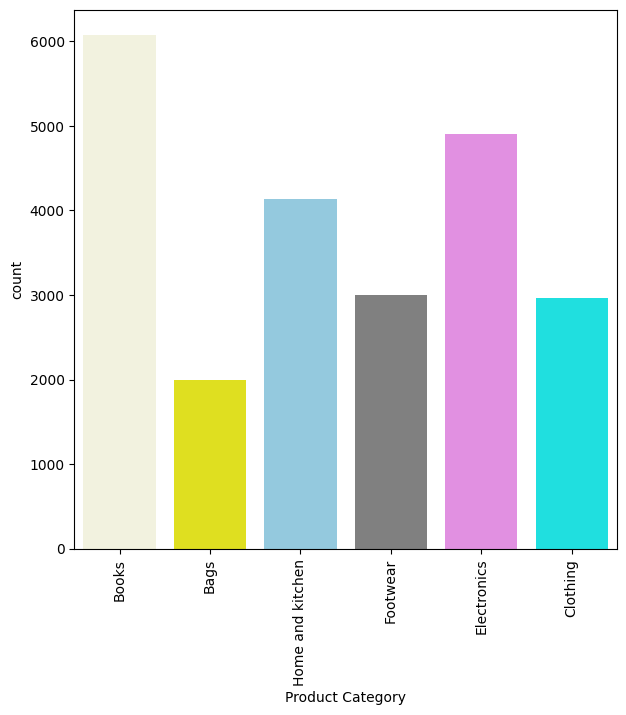

In [20]:
plt.figure(figsize=(7,7))
sns.countplot(x = cat_var['prod_cat'], palette = ['beige', 'yellow', 'skyblue', 'grey', 'violet', 'aqua'])
plt.xlabel('Product Category')
plt.xticks(rotation='vertical')
plt.show()

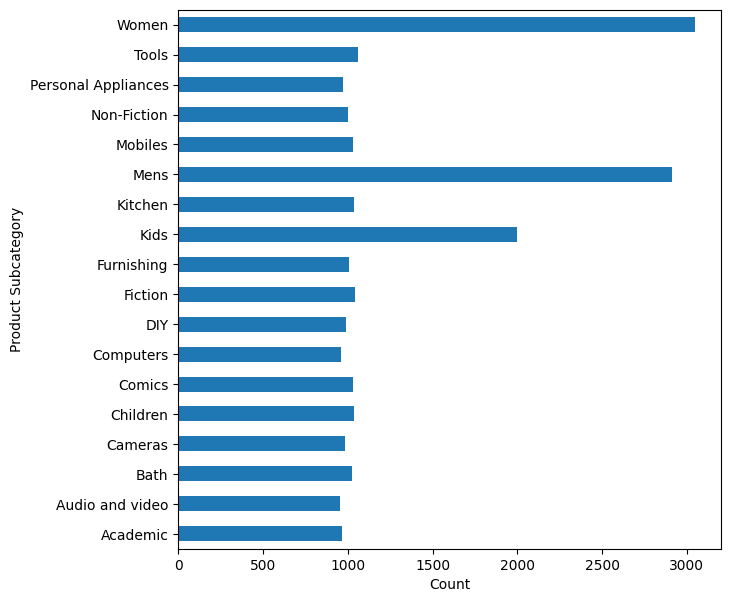

In [21]:
plt.figure(figsize=(7,7))
cat_var.groupby('prod_subcat')['prod_subcat'].count().plot(kind='barh')
plt.xlabel('Count')
plt.ylabel('Product Subcategory')
plt.show()

#### Calculate the following information using the merged dataset :

##### a. Time period of the available transaction data

In [22]:
time_range = (Customer_Final['tran_date'].max() - Customer_Final['tran_date'].min())
yr = (time_range/365).days
mm = (time_range*0.032855).days
print(' Time period of the available transaction data: \n\n', 'equivalent to ', time_range.days, ' days; \n', 
      'equivalent to ', mm, ' months; \n', 
      'equivalent to ', yr, ' years ', )

 Time period of the available transaction data: 

 equivalent to  1130  days; 
 equivalent to  37  months; 
 equivalent to  3  years 


##### b. Count of transactions where the total amount of transaction was negative

###### Solution-1: Count of transactions where the total amount of transaction was negative

In [23]:
Customer_Final.query("(total_amt < 0)")['transaction_id'].count()

2177

###### Solution-2: Unique transactions where total_amt was negative

In [24]:
trans.query("(total_amt < 0)")['transaction_id'].nunique()

2059

#### Analyze which product categories are more popular among females vs male customers.

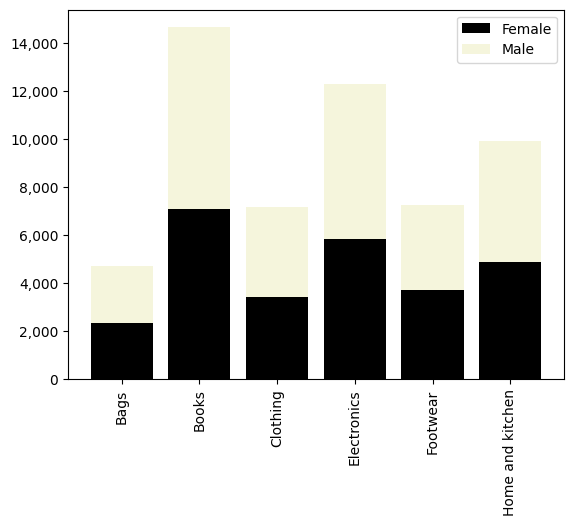

In [25]:
prod_pop = pd.DataFrame(Customer_Final.groupby(['Gender', 'prod_cat'])['Qty'].agg('sum')).reset_index()
prod_pop = prod_pop.pivot(index = ['prod_cat'], values = 'Qty', columns = 'Gender').reset_index()

x = prod_pop['prod_cat']
y1 = prod_pop['F']
y2 = prod_pop['M']
plt.bar(x, y1, color = 'black')
plt.bar(x, y2, bottom = y1, color = 'beige')
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.xticks(rotation='vertical')
plt.legend(['Female', 'Male'], loc='upper right')

plt.show()

In [26]:
product_by_gender = pd.DataFrame(prod_pop.groupby('prod_cat')[['F', 'M']].agg('max').max(axis = 1)).reset_index().rename(columns = {0 : 'ttl_qty'})

f = (product_by_gender['ttl_qty'] == prod_pop['F'])
product_by_gender['dominant_gender'] = f.apply(lambda x: 'Female' if x == True else 'Male')
product_by_gender

,prod_cat,ttl_qty,dominant_gender
0,Bags,2362,Female
1,Books,7587,Male
2,Clothing,3748,Male
3,Electronics,6476,Male
4,Footwear,3716,Female
5,Home and kitchen,5041,Male


In [27]:
print("Popular product categories among Male customers: ", ', '.join(product_by_gender.loc[product_by_gender['dominant_gender'] == 'Male', 'prod_cat'].values))
print("Popular product categories among Female customers: ", ', '.join(product_by_gender.loc[product_by_gender['dominant_gender'] == 'Female', 'prod_cat'].values))

Popular product categories among Male customers:  Books, Clothing, Electronics, Home and kitchen
Popular product categories among Female customers:  Bags, Footwear


#### Which City code has the maximum customers and what was the percentage of customers from that city?

In [28]:
city_cus = pd.DataFrame(Customer_Final.groupby(['city_code'])['customer_Id'].agg('count'))
city_cus['% of customers'] = [round((i/city_cus['customer_Id'].sum())*100, 2) for i in city_cus['customer_Id']]
city_cus.rename(columns = {'customer_Id' : 'cust_cnt'}, inplace = True)
city_cus.sort_values('cust_cnt', ascending = False).nlargest(1, columns = ['cust_cnt', '% of customers'])

,cust_cnt,% of customers
city_code,,
4,2422,10.51


#### Which store type sells the maximum products by value and by quantity?

In [29]:
top_store_type = Customer_Final.groupby(['Store_type'])[['Qty', 'Rate']].sum().sort_values(['Qty', 'Rate'], ascending = False)
top_store_type.head(1)

,Qty,Rate
Store_type,,
e-Shop,22763,5941001


#### What was the total amount earned from the "Electronics" and "Clothing" categories from Flagship Stores?

In [30]:
store_type = Customer_Final['Store_type'] == 'Flagship store'
product_cat = (Customer_Final['prod_cat'] == 'Electronics') | (Customer_Final['prod_cat'] == 'Clothing')

resultSet1 = pd.DataFrame(Customer_Final[store_type & product_cat].groupby(['Store_type', 'prod_cat', 'prod_subcat'])['total_amt'].agg('sum'))#.reset_index()
resultSet1

total_amt
Store_type     prod_cat    prod_subcat                    
Flagship store Clothing    Kids                 422716.645
                           Mens                 373711.000
                           Women                397995.585
               Electronics Audio and video      369995.990
                           Cameras              443910.545
                           Computers            487279.585
                           Mobiles              524676.100
                           Personal Appliances  389273.820

#### What was the total amount earned from "Male" customers under the "Electronics" category?

##### Method-1: Using masking to filter 'Male' only and 'Electronics' only records 

In [31]:
gender_type = Customer_Final['Gender'] == 'M'
product_cat = Customer_Final['prod_cat'] == 'Electronics'
round(Customer_Final[gender_type & product_cat].groupby(['Gender', 'prod_cat'])['total_amt'].agg('sum'), 2)

Gender  prod_cat   
M       Electronics    5703109.42
Name: total_amt, dtype: float64

##### Method-2: pivoting the data

In [33]:
gender_group = Customer_Final.pivot_table(index = 'prod_cat', values = 'total_amt', columns = ['Gender'], aggfunc = 'sum')
print("total amount earned from 'Male' customers under the 'Electronics' category: ", round(gender_group.loc['Electronics', 'M'], 2))

total amount earned from 'Male' customers under the 'Electronics' category:  5703109.42


#### How many customers have more than 10 unique transactions, after removing all transactions which have any negative amounts?

In [34]:
posVal = Customer_Final['total_amt'] > 0
cust_metric = Customer_Final.loc[posVal, ['customer_Id', 'transaction_id', 'total_amt']]
cust_metric = pd.DataFrame(cust_metric.groupby(['customer_Id', 'transaction_id'])['transaction_id'].agg('count')).rename(columns = {'transaction_id' : 'trans_cnt'}).reset_index()
resultSet2 = pd.DataFrame(cust_metric.groupby('customer_Id')['trans_cnt'].agg('sum')).reset_index()
resultSet3 = resultSet2[resultSet2['trans_cnt'] > 10]
resultSet3

,customer_Id,trans_cnt
4,266794,11
2426,270535,11
2606,270803,11
3867,272741,11
4032,273014,11
4815,274227,11


##### Verifying the results

In [35]:
# For each customer_Id in the resultSet3 there are 11 unique transactions

unique_trans = pd.merge(resultSet3, 
                        Customer_Final, 
                        on = 'customer_Id', 
                        how = 'inner')

unique_trans.groupby('customer_Id')['transaction_id'].nunique()

customer_Id
266794    11
270535    11
270803    11
272741    11
273014    11
274227    11
Name: transaction_id, dtype: int64

#### For all customers aged between 25 - 35, find out:

##### a. What was the total amount spent for “Electronics” and “Books” product categories?

###### Step-1: To calculate the age of customers (including DOB with leap year)

In [36]:
year_diff = dt.datetime.now().year - Customer_Final['DOB'].dt.year
birth_month_day = Customer_Final['DOB'].apply(lambda x: (x.month, x.day))
month_day_diff = birth_month_day > (dt.datetime.now().month, dt.datetime.now().day)
Customer_Final['Age'] = year_diff - month_day_diff
Customer_Final['Age']

0        54
1        54
2        54
3        54
4        54
         ..
23048    31
23049    31
23050    31
23051    31
23052    31
Name: Age, Length: 23053, dtype: int32

###### Step-2: Filter the customer age group and product categories

In [37]:
ageFilter = Customer_Final['Age'].between(25, 35)
productFilter = (Customer_Final['prod_cat'] == 'Electronics') | (Customer_Final['prod_cat'] == 'Books')
age_group = Customer_Final[ageFilter & productFilter]
age_group.groupby(['prod_cat', 'Age'])['total_amt'].agg('sum')

prod_cat     Age
Books        31     382977.530
             32     538003.505
             33     478739.040
             34     525726.955
             35     528945.820
Electronics  31     294725.600
             32     409514.105
             33     402299.560
             34     537011.215
             35     477857.250
Name: total_amt, dtype: float64

###### Step-3: Create age-groups

In [188]:
Customer_Final.loc[Customer_Final['Age'].between(25, 35, 'both'), 'age_group'] = '25-35'
Customer_Final.loc[Customer_Final['Age'].between(35, 45, 'right'), 'age_group'] = '35-45'
Customer_Final.loc[Customer_Final['Age'].between(45, 50, 'right'), 'age_group'] = '45-50'
Customer_Final.loc[Customer_Final['Age'].between(50, 55, 'right'), 'age_group'] = '50-55'
Customer_Final

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_sub_cat_code,prod_cat,prod_subcat,Age,age_group
0,268408,1970-01-02,M,4,87243835584,268408,2014-01-13,7,5,5,187,98.175,1033.175,TeleShop,7,Books,Fiction,54,50-55
1,268408,1970-01-02,M,4,16197868036,268408,2013-12-16,1,4,-5,-210,110.250,-1160.250,Flagship store,1,Bags,Mens,54,50-55
2,268408,1970-01-02,M,4,16197868036,268408,2013-12-12,1,4,5,210,110.250,1160.250,Flagship store,1,Bags,Mens,54,50-55
3,268408,1970-01-02,M,4,28810141075,268408,2013-09-02,10,6,2,813,170.730,1796.730,TeleShop,10,Home and kitchen,Kitchen,54,50-55
4,268408,1970-01-02,M,4,64633435931,268408,2013-05-06,4,2,3,312,98.280,1034.280,Flagship store,4,Footwear,Kids,54,50-55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23048,269626,1992-12-27,F,5,71369029396,269626,2011-10-18,12,6,1,638,66.990,704.990,e-Shop,12,Home and kitchen,Tools,31,25-35
23049,269626,1992-12-27,F,5,94134051896,269626,2011-07-07,3,1,3,1078,339.570,3573.570,MBR,3,Clothing,Kids,31,25-35
23050,274308,1992-12-29,F,5,26208690928,274308,2012-10-22,1,2,2,898,188.580,1984.580,MBR,1,Footwear,Mens,31,25-35
23051,274308,1992-12-29,F,5,57358822237,274308,2012-09-05,1,2,4,876,367.920,3871.920,e-Shop,1,Footwear,Mens,31,25-35


###### Step-4: Aggregate the data in age-group of 25-35

In [189]:
ageFilter = Customer_Final['age_group'] == '25-35'
productFilter = (Customer_Final['prod_cat'] == 'Electronics') | (Customer_Final['prod_cat'] == 'Books')
Customer_Final[ageFilter & productFilter].groupby(['age_group', 'prod_cat'])['total_amt'].agg('sum')

age_group  prod_cat   
25-35      Books          2494980.605
           Electronics    2149405.115
Name: total_amt, dtype: float64

In [190]:
# Combined revenue
print("Revenue generated in 'Electronics' and 'Books' product categories: ", Customer_Final[ageFilter & productFilter].groupby(['age_group', 'prod_cat'])['total_amt'].agg('sum').sum())

Revenue generated in 'Electronics' and 'Books' product categories:  4644385.72


##### b. What was the total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014?

In [191]:
ageFilter = Customer_Final['age_group'] == '25-35'
dtFilter1 = (Customer_Final['tran_date'].dt.strftime('%Y-%m-%d') >= '2014-01-01') & (Customer_Final['tran_date'].dt.strftime('%Y-%m-%d') <= '2014-03-01')

reseultSet1 = pd.DataFrame(Customer_Final[dtFilter1 & ageFilter].groupby(['tran_date', 'age_group'])['total_amt'].agg('sum')).sum()
print("Toatal amount spent by age-group of 25-35 between 1st Jan, 2014 to 1st Mar, 2014 (Including negative values):", round(reseultSet1['total_amt'], 2))

reseultSet2 = pd.DataFrame(Customer_Final[dtFilter1 & ageFilter].groupby(['tran_date', 'age_group'])['total_amt'].agg('sum'))
reseultSet2 = round(reseultSet2[reseultSet2['total_amt'] > 0].sum(), 2)
print("Toatal amount spent by age-group of 25-35 between 1st Jan, 2014 to 1st Mar, 2014 (Excluding negative values):", reseultSet2['total_amt'])


Toatal amount spent by age-group of 25-35 between 1st Jan, 2014 to 1st Mar, 2014 (Including negative values): 523883.81
Toatal amount spent by age-group of 25-35 between 1st Jan, 2014 to 1st Mar, 2014 (Excluding negative values): 540059.91
